# Introduction

provide a brief summary (1-2 paragraphs) about your feature data X and what you are trying to achieve with your clustering

# Theory

brief technical write up about how each clustering method works (KMEAN, DBSCAN, hierarchical clustering). Also include details on model selection methods that you use (elbow, silhouette, gap, etc.). Around 2-4 paragraphs per method is fine - focusing on how it works and what it is supposed to do


### K-MEANS

<!-- K-Means clustering, a widely acclaimed algorithm, stands out for its simplicity and effectiveness, making it a favorite among beginners. The user's role is pivotal; they decide on 'k,' the number of clusters that will shape the data. The algorithm initiates by assigning data points to k clusters, with centroids acting as their center. Distances, typically calculated using Euclidean distance, guide this process. Iteratively, points shuffle between clusters, and new centroids emerge, a process termed Lloyd's algorithm, until no better cluster assignments are possible.

The essence of K-Means lies in optimizing the sum of squared distances between data points and their assigned cluster mean. The user's decision on 'k' determines the number of centroids, representing cluster centers. The algorithm strategically redistributes points to minimize in-cluster sum of squares. Its simplicity and popularity make it a staple in unsupervised machine learning, exemplifying its capacity to unravel inherent patterns in data.

In the grander scheme, K-Means clustering emerges as a technique to group data points based on their similarity to an average grouping. Distance metrics, like Euclidean or Manhattan distance, play a vital role, and normalization of input data becomes crucial for robust performance. Centroids, the algorithm's starting point, evolve through successive iterations, refining cluster assignments and centroids' positions. While 'k' is user-specified, the algorithm's convergence unveils meaningful clusters, transforming data chaos into structured insights. Implementation through sklearn's KMeans algorithm adds efficiency, and feature selection empowers users to tailor the clustering process to their data's nuances.



Imagine you're given a room filled with a diverse collection of items – each unique and unsorted. Your task is to categorize them into distinct groups based on their similarities. This is where K-Means clustering comes into play, acting like a smart organizer that automatically groups similar items together.

At the beginning of the process, you decide how many groups (clusters) you want. Think of these clusters as piles you aim to create in the room. You randomly place markers (cluster centers) equal to the number of desired clusters. The algorithm then starts assigning each item to the nearest marker, forming initial clusters. It's like sorting the room into rough piles.

The magic happens during the adjustment phase. The algorithm repositions each marker to the center of its cluster and recalculates assignments. This process repeats until the piles become stable, meaning items are consistently assigned to the nearest cluster. The result is an organized room with distinct groups – a reflection of inherent patterns within the data.

K-Means clustering is not just about sorting data; it's a powerful tool for revealing natural structures within complex information. In a business context, it could mean identifying customer segments with similar preferences, enabling personalized marketing strategies or targeted product recommendations. Essentially, K-Means turns chaotic data into meaningful insights, making it a valuable asset for informed decision-making. -->

### DBSCAN

### Hierarchical Clustering

# Methods

* make sure to use cold folding
* describe your coding workflow
* data selection
* feature selection (optional)
* hyper-parameter tuning
* final results

### Import libraries and load the dataset

In [8]:
# import the necessary packages...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# read in the feature dataset
df = pd.read_csv('./data/modified_data/nova_features.csv')

# KMeans

In [9]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import MeanShift, Birch
from sklearn.metrics import pairwise_distances, silhouette_score
import random

In [10]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.

# Create empty lists to store the results
clus = []
distortions = []
inertias = []
silhouette_scores = []

# Loop through the range of clusters
for i in range(2, 11):  # Silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)  
    clus.append(i)
    centers = kmeans.cluster_centers_
    distortions.append(sum(np.min(pairwise_distances(df, centers, metric='euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Create a DataFrame from the lists
results = pd.DataFrame({'Cluster': clus, 'Distortion': distortions, 'Inertia': inertias, 'Silhouette Score': silhouette_scores})

print(results)

/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

   Cluster  Distortion        Inertia  Silhouette Score
0        2   10.622510  447410.233953          0.372238
1        3    8.828917  272970.775541          0.408870
2        4    7.974259  215311.617146          0.390174
3        5    6.985968  163526.599625          0.380241
4        6    6.394550  134984.307974          0.368484
5        7    5.753101  113388.811614          0.384348
6        8    5.309537   94219.154891          0.403127
7        9    5.020084   83855.750340          0.403238
8       10    4.698719   75156.752577          0.386414


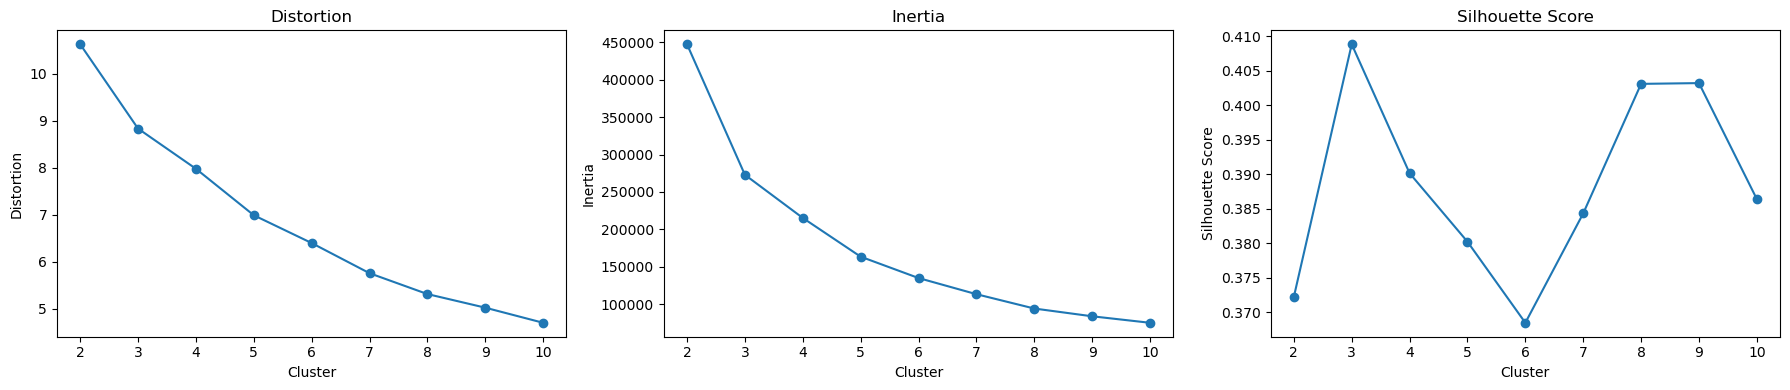

In [11]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
# Create subplots with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Plot Distortion
ax[0].plot(results['Cluster'], results['Distortion'], marker='o')
ax[0].set_title('Distortion')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Distortion')

# Plot Inertia
ax[1].plot(results['Cluster'], results['Inertia'], marker='o')
ax[1].set_title('Inertia')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Inertia')

# Plot Silhouette Score
ax[2].plot(results['Cluster'], results['Silhouette Score'], marker='o')
ax[2].set_title('Silhouette Score')
ax[2].set_xlabel('Cluster')
ax[2].set_ylabel('Silhouette Score')

# Display the side-by-side plots
plt.tight_layout()
plt.show()

jorge: add 3 is good empirically using elbow method and silhouette score method also says that so seems constant.

# DBSCAN

    Epsilons  Best_Clusters  Best_Silhouette
0        0.5            595         0.065783
1        0.6            595         0.065783
2        0.7            595         0.065783
3        0.8            595         0.065783
4        0.9            595         0.065783
5        1.0            456         0.020257
10       1.5             33        -0.029439
11       1.6             33        -0.029439
12       1.7             33        -0.029439
6        1.1            216        -0.040136
7        1.2            216        -0.040136
8        1.3            216        -0.040136
9        1.4            216        -0.040136
13       1.8             22        -0.117656
14       1.9             22        -0.117656


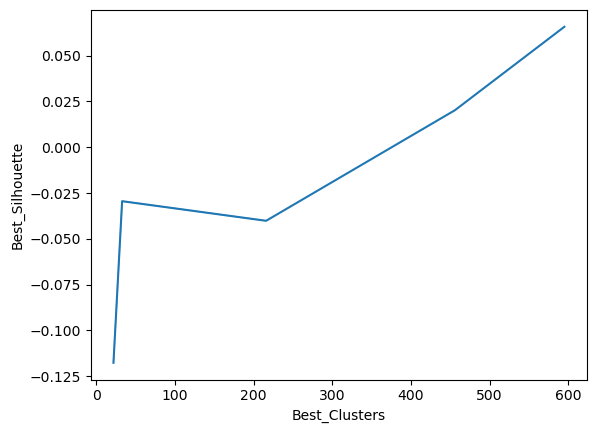

In [12]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.

best_scores = []
eps = []
clus = []
z1 = [i / 10 for i in range(5, 20)]
z2 = range(2, 10) # explain why 2 to 10 or just do 1 to 10 but then u have to fix smth in the code if i dont remember wrong. i suggest explaining is a common assumption to do here

for i in z1:
    max_score = -1
    best_cluster = -1
    best_eps = -1
    for j in z2:
        model = DBSCAN(eps=i, min_samples=j)
        predics = model.fit_predict(df)
        num_clusters = len(pd.Series(predics).unique())
        if num_clusters > 1:
            score = silhouette_score(df, predics)
            if score > max_score:
                max_score = score
                best_cluster = num_clusters
                best_eps = i

    best_scores.append(max_score)
    clus.append(best_cluster)
    eps.append(best_eps)

df1 = pd.DataFrame({'Epsilons': eps, 'Best_Clusters': clus, 'Best_Silhouette': best_scores})
print(df1.sort_values(by="Best_Silhouette", ascending=False))
sns.lineplot(data=df1, x='Best_Clusters',y='Best_Silhouette')
plt.show()

from this i can infer that there are no clear clusters as the best silhouette score have over 500 clusters. 

jorge: Say that maybe is due to that this clustering method is not suitable for this type of data and that u will confirm with hierarchical and plots with t-sne

# Hierarchical Clustering (Agglomerative Clustering)

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') #chose 3 as that is the number of species. We could have changed it.
labels = hierarchical_cluster.fit_predict(df)
print("Cluster Labels total:")
print(list(set(labels)))

Cluster Labels total:
[0, 1, 2]


/Users/williammcgloin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Plot the clusters for Agglomerative Clustering

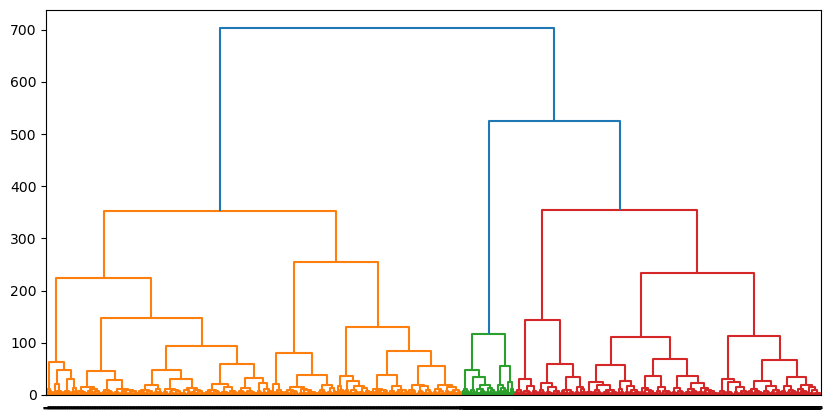

In [15]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
linkage_matrix = linkage(df, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', labels=labels, distance_sort='ascending', show_leaf_counts=True)
plt.show()

Maximum Silhouette score = 0.3971383731982046
OPTIMAL CLUSTERS (btwn 2-10) = 3


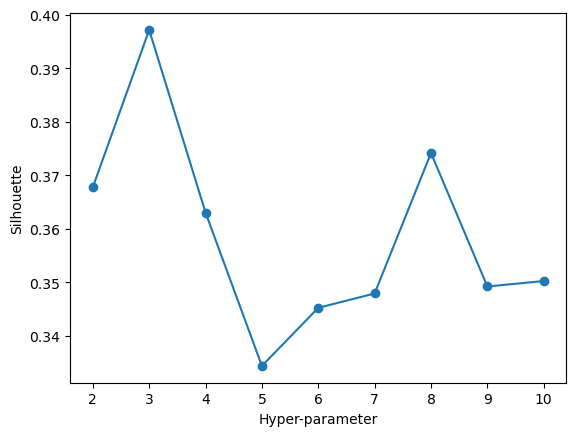

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster

def maximize_silhouette(X, algo="ag", nmax=None, i_plot=False):
    # PARAM
    i_print = False

    # FORCE CONTIGUOUS
    X = np.ascontiguousarray(X)

    # LOOP OVER HYPER-PARAM
    params = []
    sil_scores = []
    sil_max = -10

    for param in range(2, nmax + 1):
        if algo == "ag":
            model = AgglomerativeClustering(n_clusters=param).fit(X)
            labels = model.labels_
            
            try:
                sil_scores.append(silhouette_score(X, labels))
                params.append(param)
            except ValueError:
                continue

            if i_print:
                print(param, sil_scores[-1])

            if sil_scores[-1] > sil_max:
                opt_param = param
                sil_max = sil_scores[-1]
                opt_labels = labels

    print("Maximum Silhouette score =", sil_max)
    print("OPTIMAL CLUSTERS (btwn 2-10) =", opt_param)

    if i_plot:
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

# Example usage:
opt_labels = maximize_silhouette(df, algo="ag", nmax=10, i_plot=True)


# Results

discuss, illustrate, and compare the results of your various clustering analysis methods. Additionally, answer questions on hw page

# Conclusions

summarize and wrap up the report. This is non-technical and should focus on key and important findings and how these findings affect real-life and real people.

# References

ideally use .bibtex to provide in-line citations

# Extra Joke

Movie Pitch: It’s a movie about high school girls trying to figure out what clique they belong in. They move from clique to clique and eventually stop when they minimize their differences. It’s called K-Means girls.
<br></br>
![](./images/mean_girls.gif)